##Import libraries

In [128]:
#Enable plots to be displayed in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import statistics
import regex as reg
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Mount to Drive

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
cd /content/gdrive/MyDrive/VIT/Tamil Argumentation/

/content/gdrive/MyDrive/VIT/Tamil Argumentation


In [57]:
!ls

EDA_1.ipynb  tamil_stopwords.txt	    VANAVIL-Avvaiyar-Regular.otf
EDA_2.ipynb  Twitter_Argument_Dataset.xlsx


##Tamil Font

In [61]:
font_path = "/content/gdrive/MyDrive/VIT/Tamil Argumentation/SaiIndira.ttf"

## Reading Data from a CSV File




In [5]:
twitter_df = pd.read_excel('Twitter_Argument_Dataset.xlsx',index_col=False)

In [6]:
new_column_names =  ['sno', 'Tweet', 'Date', 'Topic', 'Parent_Tweet', 'Language', 'Quality',
       'Stance', 'Argumentation', 'Comment', 'Responding_to_tone',
       'writer_characteristics', 'Remark', 'Relevancy']

twitter_df.columns = new_column_names

## Preliminary data inspection



In [7]:
twitter_df.shape

(1350, 14)

In [8]:
#Print general information about a DataFrame including the index dtype and columns, non-null values and memory usage
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sno                     1350 non-null   int64         
 1   Tweet                   1350 non-null   object        
 2   Date                    1350 non-null   datetime64[ns]
 3   Topic                   1350 non-null   object        
 4   Parent_Tweet            1350 non-null   object        
 5   Language                1350 non-null   object        
 6   Quality                 1350 non-null   object        
 7   Stance                  1350 non-null   object        
 8   Argumentation           1350 non-null   int64         
 9   Comment                 1350 non-null   int64         
 10  Responding_to_tone      1350 non-null   int64         
 11  writer_characteristics  1350 non-null   int64         
 12  Remark                  1350 non-null   int64   

In [9]:
# Use the .head(n) function to look at the first 'n' rows of our news dataframe. The default n is 5, we are now changing it to view the first 10 rows
twitter_df.head(10)


,sno,Tweet,Date,Topic,Parent_Tweet,Language,Quality,Stance,Argumentation,Comment,Responding_to_tone,writer_characteristics,Remark,Relevancy
0,1,"Bro imagine today is Friday , big star movie i...",2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Undetermined,0,1,0,0,0,Relevant
1,2,Dei unnoda akkarai TN mela not on others and w...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Against,0,1,0,1,0,Relevant
2,3,En ninga ivara matum mention panuringa naraiya...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,For,0,1,0,0,0,Relevant
3,4,What is happening in Thoothukudi is totally no...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,High,Against,1,1,0,0,0,Relevant
4,5,Ungaluku Sterlite protest prachanaya illa Bala...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Undetermined,0,0,1,0,0,Relevant
5,6,Ipo neenga tweet podra nala matram vara poguth...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Undetermined,0,1,0,0,0,Relevant
6,7,"bro., i would like you to see this too",2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",ENGLISH,Med,Undetermined,0,0,0,0,0,Irrelevant
7,8,https://twitter.com/itisprashanth/status/99878...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,High,Against,1,1,0,0,0,Relevant
8,9,Shankar potathu unaku therila !@USER_32 potath...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Against,0,1,0,1,1,Relevant
9,10,Bro avaru already oru tweet potaru bro..About ...,2018-05-22,Jalikattu,"And tamil people, jalikattu maadu for money an...",CODE-MIXED,Med,Against,0,1,0,1,0,Relevant


In [10]:
twitter_df.columns

Index(['sno', 'Tweet', 'Date', 'Topic', 'Parent_Tweet', 'Language', 'Quality',
       'Stance', 'Argumentation', 'Comment', 'Responding_to_tone',
       'writer_characteristics', 'Remark', 'Relevancy'],
      dtype='object')

##Unique Values and Frequency

Topics :  ['Jalikattu' 'Free bus commute for women. boon or bane'
 'Covid vaccine - Boon or bane' 'Alcohol and Drugs' 'NEET: Boon or Bane'] 

Covid vaccine - Boon or bane                382
Jalikattu                                   346
Alcohol and Drugs                           286
Free bus commute for women. boon or bane    267
NEET: Boon or Bane                           69
Name: Topic, dtype: int64 



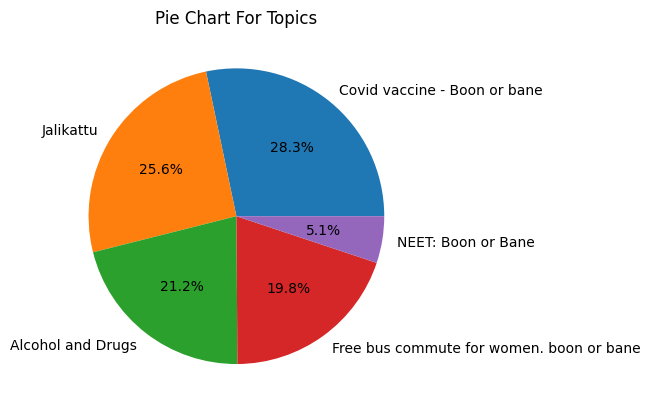

In [11]:
topics = twitter_df['Topic'].unique()

print("Topics : ",twitter_df['Topic'].unique(),"\n")
print(twitter_df['Topic'].value_counts(),"\n")

vc = twitter_df['Topic'].value_counts()

plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%')

plt.title('Pie Chart For Topics')
plt.show()

Parent Tweet Counts :  41 

parent tweets in each topic

                                     topics  Parent_Tweets
0                                 Jalikattu              8
1  Free bus commute for women. boon or bane              9
2              Covid vaccine - Boon or bane             12
3                         Alcohol and Drugs              7
4                        NEET: Boon or Bane              5


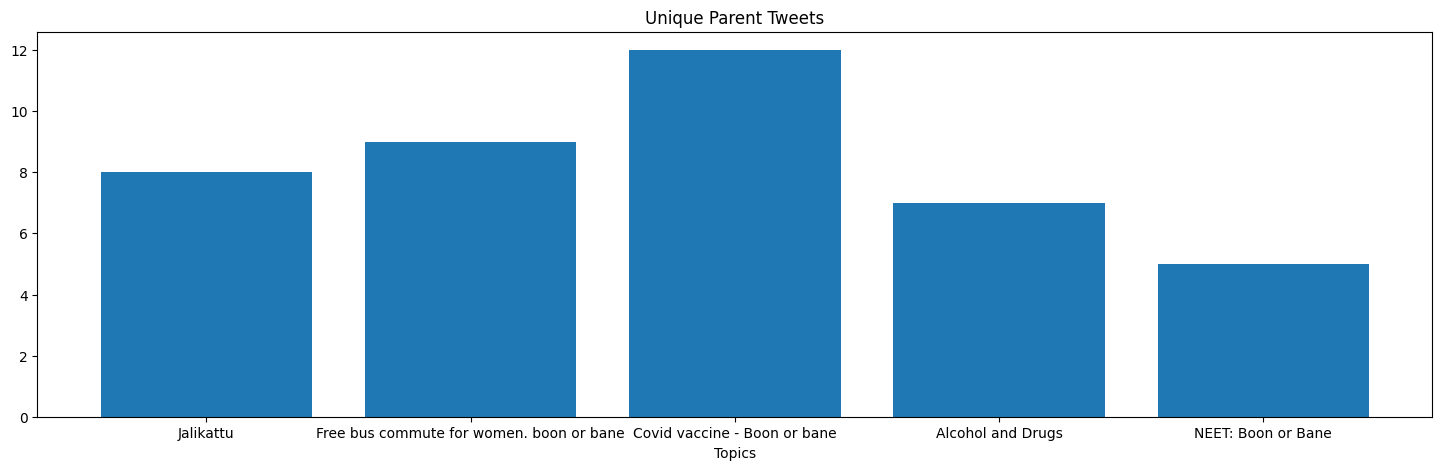

In [12]:
ptweets = twitter_df['Parent_Tweet'].unique()

print("Parent Tweet Counts : ",len(ptweets),"\n")

print("parent tweets in each topic\n")

p_t = []

for x in topics:
  sub_df = twitter_df[twitter_df['Topic']==x]
  p_t.append(len(sub_df['Parent_Tweet'].value_counts()))

pt_df = pd.DataFrame({"topics":topics,"Parent_Tweets":p_t})

print(pt_df)

plt.figure(figsize=(18,5))

plt.bar(pt_df["topics"],pt_df["Parent_Tweets"])

plt.xlabel('Topics')
plt.title('Unique Parent Tweets')

plt.show()

Language

ENGLISH       623
CODE-MIXED    397
TAMIL         330
Name: Language, dtype: int64 

Quality

Med     849
Low     304
High    197
Name: Quality, dtype: int64 

Stance

Against         626
Undetermined    437
For             287
Name: Stance, dtype: int64 

Argumentation

0    1139
1     211
Name: Argumentation, dtype: int64 

Comment

1    1047
0     303
Name: Comment, dtype: int64 

Responding_to_tone

0    1112
1     238
Name: Responding_to_tone, dtype: int64 

writer_characteristics

0    990
1    360
Name: writer_characteristics, dtype: int64 

Remark

0    1009
1     341
Name: Remark, dtype: int64 

Relevancy

Relevant      1251
Irrelevant      99
Name: Relevancy, dtype: int64 



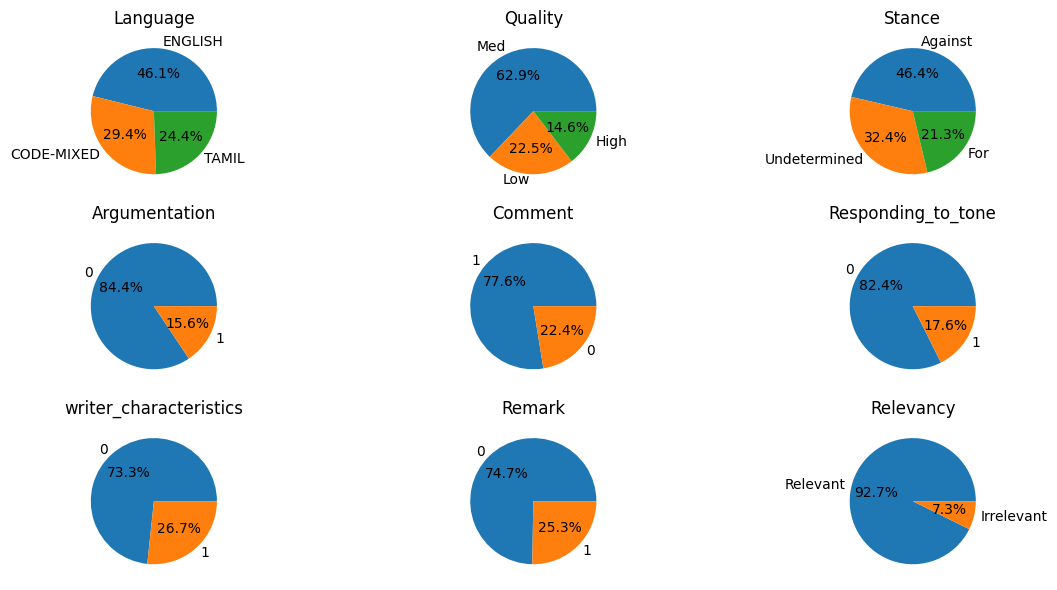

In [13]:
sub_cols = twitter_df.columns[5:]

fig, axs = plt.subplots(3, 3, figsize=(12, 6))

axs = axs.flatten()

for i in range(len(sub_cols)):
  vc = twitter_df[sub_cols[i]].value_counts()

  print(f"{sub_cols[i]}\n")
  print(vc,"\n")

  axs[i].pie(vc.values, labels=vc.index, autopct='%1.1f%%')
  axs[i].set_title(sub_cols[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

## Word Count

In [14]:
#To make it easier to reuse in the future, we can create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

**Mean and Mode of word count for the tweets**

Statistics of Word Count

Mean :  14
Mode :  7


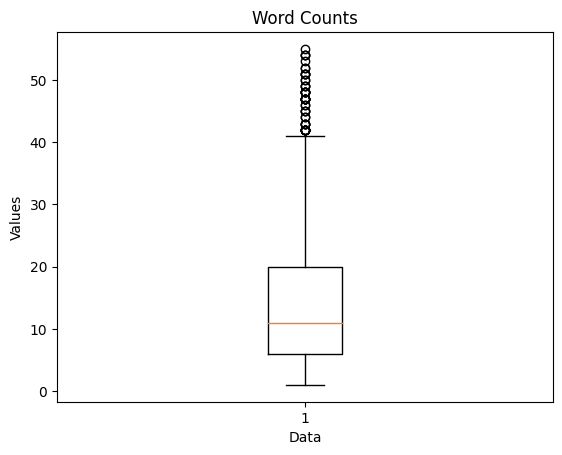

In [15]:
wc = 0
z =0
wc_list = []

for x in twitter_df['Tweet']:
  z = word_count(x)
  wc+=z
  wc_list.append(z)

Average_WC = int(wc/twitter_df.shape[0])

print("Statistics of Word Count\n")
print("Mean : ",int(statistics.mean(wc_list)))
print("Mode : ",statistics.mode(wc_list))

plt.boxplot(wc_list)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Word Counts')

plt.show()

**Number of tweets with one, two and three words**

In [16]:
print("Number of Tweets with single word : ",wc_list.count(1))
print("Number of Tweets with two words : ",wc_list.count(2))
print("Number of Tweets with three words : ",wc_list.count(3))

Number of Tweets with single word :  44
Number of Tweets with two words :  50
Number of Tweets with three words :  66


**Average word count for each topic**

In [17]:
print("average word Count per Topic\n")

for x in topics:
  sub_df = twitter_df[twitter_df['Topic']==x]

  wc=0

  for x in sub_df['Tweet']:
    wc+= word_count(x)

  Average_WC = int(wc/sub_df.shape[0])
  print(sub_df.iloc[0,3]," : ",Average_WC)

average word Count per Topic

Jalikattu  :  15
Free bus commute for women. boon or bane  :  14
Covid vaccine - Boon or bane  :  13
Alcohol and Drugs  :  16
NEET: Boon or Bane  :  11


**Average word count for all other columns and classes**

Language 

ENGLISH  :  19
CODE-MIXED  :  9
TAMIL  :  11


Quality 

Med  :  12
High  :  24
Low  :  14


Stance 

Undetermined  :  11
Against  :  16
For  :  15


Argumentation 

0  :  12
1  :  24


Comment 

1  :  15
0  :  9


Responding_to_tone 

0  :  14
1  :  13


writer_characteristics 

0  :  13
1  :  16


Remark 

0  :  14
1  :  13


Relevancy 

Relevant  :  14
Irrelevant  :  12




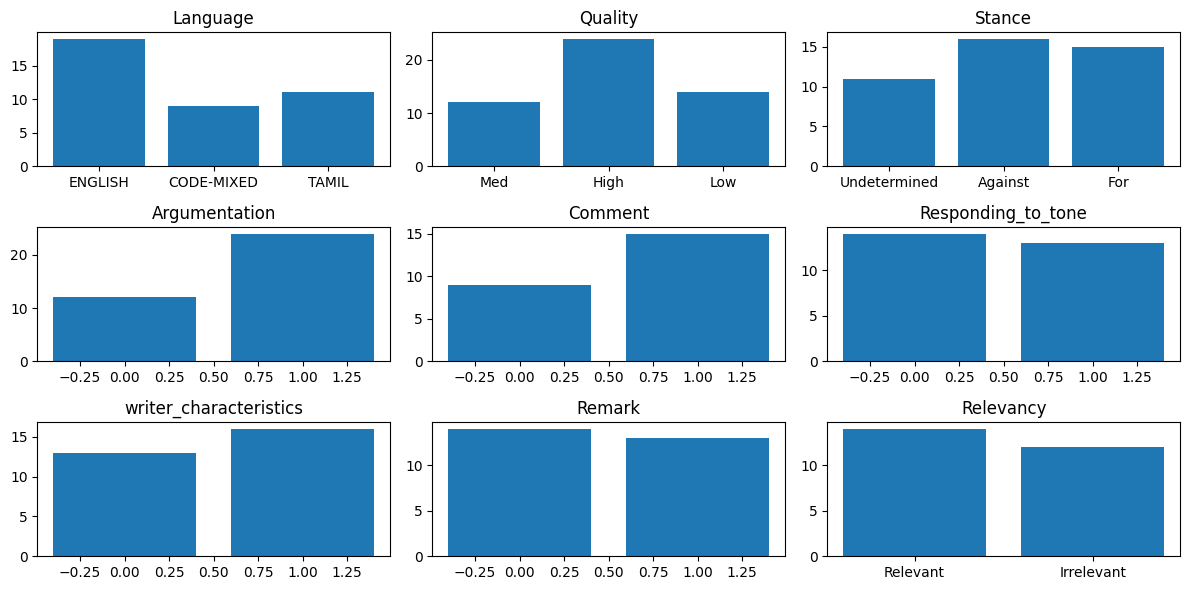

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(12, 6))

axs = axs.flatten()

i=0

for y in sub_cols:
  print(y,"\n")
  values = []

  for z in twitter_df[y].unique():
    sub_df = twitter_df[twitter_df[y]==z]

    wc=0

    for x in sub_df['Tweet']:
      wc+= word_count(x)

    Average_WC = int(wc/sub_df.shape[0])
    print(z," : ",Average_WC)
    values.append(Average_WC)

  print("\n")

  axs[i].bar(twitter_df[y].unique(),values)
  axs[i].set_title(y)
  i+=1

plt.tight_layout()   # Adjust the spacing between subplots

plt.show()

## Word frequencies


Calculate frequencies to determine the most common word in the corpus

In [84]:
from nltk.corpus import stopwords
import re

#set stopwords
stopwords_set = stopwords.words('english')
stopwords_set.extend(["cnn", "'s", "a", "the","u","r"])

#stopwords for Tamil
stopwords_tamil = pd.read_csv('/content/gdrive/MyDrive/VIT/Tamil Argumentation/tamil_stopwords.txt')
stopwords_set_tamil = list(stopwords_tamil.iloc[:,0])

#create word tokens
tokenized_words = []
tamil_tokenized_words = []
code_mixed_tokenized_words = []

for i in range(twitter_df.shape[0]):
  if twitter_df['Language'][i] == "ENGLISH":
    tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

  elif twitter_df['Language'][i] == "TAMIL":
    tamil_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

  else:
    code_mixed_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',twitter_df['Tweet'][i]))

new_tokenized_words = []
new_tamil_tokenized_words = []

for x in tokenized_words:
  if x.lower().strip() not in stopwords_set:
    new_tokenized_words.append(x)

for x in tamil_tokenized_words:
  if x.lower().strip() not in stopwords_set_tamil:
    new_tamil_tokenized_words.append(x)

tokenized_words = new_tokenized_words
tamil_tokenized_words = new_tamil_tokenized_words

In [86]:
print(stopwords_set_tamil)

['என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்', 'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து', 'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்', 'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்', 'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன', 'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்', 'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்', 'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக', 'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்', 'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே', 'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற', 'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனினும்', 

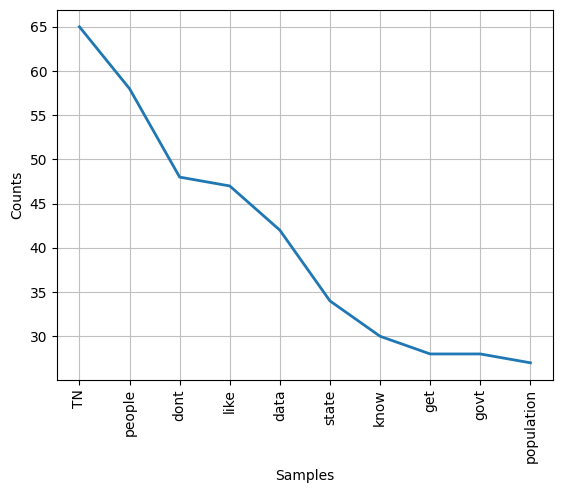

[('TN', 65), ('people', 58), ('dont', 48), ('like', 47), ('data', 42), ('state', 34), ('know', 30), ('get', 28), ('govt', 28), ('population', 27), ('jallikattu', 22), ('one', 21), ('liquor', 21), ('good', 20), ('ur', 20), ('government', 20), ('free', 20), ('Sir', 20), ('sir', 20), ('say', 19)]


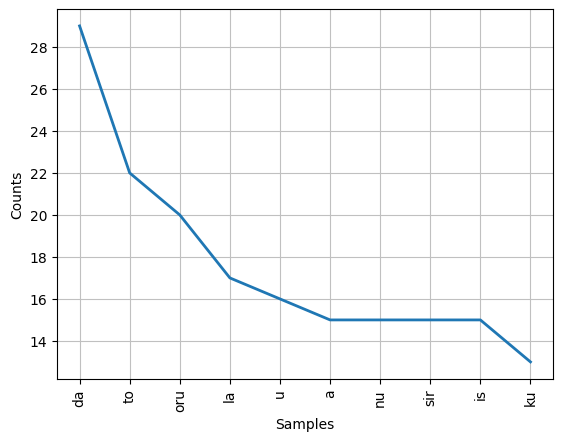

[('da', 29), ('to', 22), ('oru', 20), ('la', 17), ('u', 16), ('a', 15), ('nu', 15), ('sir', 15), ('is', 15), ('ku', 13), ('nee', 11), ('than', 10), ('tweet', 10), ('enna', 10), ('for', 9), ('and', 9), ('தன', 9), ('poi', 9), ('TN', 9), ('ah', 9)]
[('தன', 51), ('இநத', 30), ('ஒர', 27), ('பய', 26), ('கட', 25), ('ந', 24), ('எனன', 21), ('நய', 20), ('எனற', 20), ('இத', 19), ('சன', 18), ('மககள', 17), ('இலல', 17), ('தமக', 16), ('கணட', 16), ('எலலம', 15), ('நட', 15), ('உன', 15), ('கடட', 15), ('உஙகள', 14)]


In [87]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

all_words=nltk.FreqDist(code_mixed_tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

all_words=nltk.FreqDist(tamil_tokenized_words)
print(all_words.most_common(20))

**word CLoud**

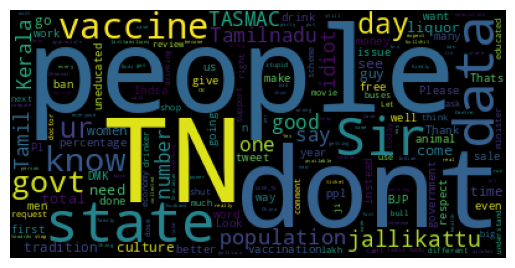

In [90]:
from wordcloud import WordCloud

tweets_text = ' '.join(tokenized_words)

english_wordcloud = WordCloud().generate(tweets_text)

import matplotlib.pyplot as plt
plt.imshow(english_wordcloud)
plt.axis("off")
plt.show()

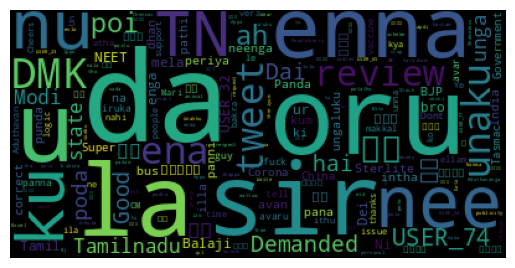

In [91]:
from wordcloud import WordCloud

tweets_text = ' '.join(code_mixed_tokenized_words)

english_wordcloud = WordCloud().generate(tweets_text)

import matplotlib.pyplot as plt
plt.imshow(english_wordcloud)
plt.axis("off")
plt.show()

## Collocations


In [97]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

english_finder = BigramCollocationFinder.from_words(tokenized_words)
tamil_finder = BigramCollocationFinder.from_words(tamil_tokenized_words)
code_mixed_finder = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

tri_english_finder = TrigramCollocationFinder.from_words(tokenized_words)
tri_tamil_finder = TrigramCollocationFinder.from_words(tamil_tokenized_words)
tri_code_mixed_finder = TrigramCollocationFinder.from_words(code_mixed_tokenized_words)

#Using PMI scores to quantify and rank the BiGrams
print(english_finder.nbest(bigram_measures.pmi, 50))
print(tamil_finder.nbest(bigram_measures.pmi, 50))
print(code_mixed_finder.nbest(bigram_measures.pmi, 50))

print("\n\n")

#Using PMI scores to quantify and rank the TriGrams
print(tri_english_finder.nbest(trigram_measures.pmi, 50))
print(tri_tamil_finder.nbest(trigram_measures.pmi, 50))
print(tri_code_mixed_finder.nbest(trigram_measures.pmi, 50))

[('100100', 'pottukuvom'), ('11', 'jun'), ('1500000', 'ro'), ('171', 'doctorformer'), ('1962', 'war'), ('2014', 'Cruelty'), ('20212022', 'planned'), ('224', '330'), ('26', 'ahead'), ('2am', 'October'), ('31', 'May'), ('35k', 'Partially'), ('5Rs', 'biscuit'), ('60', 'lacs'), ('600crore', 'Slowdown'), ('60s', '70s'), ('68', 'million'), ('7', 'results'), ('74', 'Genius'), ('95', 'Read'), ('A1', 'milk'), ('AC', 'room'), ('ACCESS', 'WORST'), ('ALCOHOL', 'EVERYONE'), ('Aam', 'admi'), ('Abt', 'jallicuttu'), ('Agreed', 'Boss'), ('Aiadmk', 'hijacked'), ('Allaha', 'enjoy'), ('Already', 'MTC'), ('Always', 'fieldpower'), ('AmendPCAactsoon', 'BanPeta'), ('Anna', 'ignored'), ('Appo', 'nenga'), ('Areas', 'Sorry'), ('Arivalayam', 'Enterprises'), ('Australian', 'Police'), ('BAKRIEID', 'COMMENTS'), ('Bakraeid', 'jallikkattu'), ('Balaji', 'Stomach'), ('BanJallikattu', 'hehehe'), ('Bitch', 'maybe'), ('Bottom', 'line'), ('Brand', 'Diversity'), ('Bring', 'App'), ('Brnds5', 'discnt'), ('Bullsbastard', 'chuti

## Word associations

In [98]:
from nltk import BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

print(english_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(tamil_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(code_mixed_finder.nbest(bigram_measures.likelihood_ratio, 20))

print("\n\n")

print(tri_english_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_tamil_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_code_mixed_finder.nbest(trigram_measures.likelihood_ratio, 20))

[('Tamil', 'Nadu'), ('Arunachal', 'Pradesh'), ('without', 'knowing'), ('white', 'board'), ('free', 'bus'), ('stop', 'eating'), ('stop', 'reviewing'), ('Jesse', 'Jackson'), ('gon', 'na'), ('non', 'veg'), ('tail', 'end'), ('vote', 'bank'), ('central', 'government'), ('social', 'media'), ('state', 'govt'), ('Jun', '32k'), ('Really', 'pathetic'), ('Respect', 'Us'), ('middle', 'class'), ('alcohol', 'consumption')]
[('படல', 'சலகக'), ('நடவடகக', 'எடகக'), ('தமழக', 'அரச'), ('களவ', 'கடக'), ('உணடயல', 'கலகக'), ('அ', 'ஒழககறம'), ('அனபமண', 'ரமதஸ'), ('உரடடடட', 'இரநதஙகள'), ('கடடயம', 'கடபபஙக'), ('நனம', 'ரட'), ('படஙகனன', 'உரடடடட'), ('மரததவர', 'அனபமண'), ('தபப', 'இலல'), ('இலவச', 'பரநத'), ('சட', 'சரண'), ('சலகக', '3000'), ('மண', 'நரம'), ('ஏமறறக', 'கணட'), ('பயணம', 'சயத'), ('சனககரனகக', 'பறநத')]
[('fare', 'increase'), ('bus', 'fare'), ('Itisprashanth', 'neeyellan'), ('after', 'fame'), ('ethuku', 'uyir'), ('grudge', 'Go'), ('kehte', 'hain'), ('kuduchu', 'valrathuku'), ('moothratha', 'kuduchu'), ('neeyellan', 'eth

**Associations with specific words of interest**

In [137]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

topic_filter1 = lambda *w: 'jallikattu' not in w
topic_filter2 = lambda *w: 'alcohol' not in w
topic_filter3 = lambda *w: 'NEET' not in w
topic_filter4 = lambda *w: 'Covid' not in w
topic_filter5 = lambda *w: 'bus' not in w

#ENGLISH
finder1 = BigramCollocationFinder.from_words(tokenized_words)
finder2 = BigramCollocationFinder.from_words(tokenized_words)
finder3 = BigramCollocationFinder.from_words(tokenized_words)
finder4 = BigramCollocationFinder.from_words(tokenized_words)
finder5 = BigramCollocationFinder.from_words(tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

#CODE_MIXED
print("\n\n")
finder1 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder2 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder3 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder4 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder5 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

topic_filter1 = lambda *w: 'ஜல்லிக்கட்டு' not in w
topic_filter2 = lambda *w: 'மது' not in w
topic_filter3 = lambda *w: 'நீட்' not in w
topic_filter4 = lambda *w: 'கோவிட்' not in w
topic_filter5 = lambda *w: 'பஸ்' not in w

#TAMIL
print("\n\n")
finder1 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder2 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder3 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder4 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder5 = BigramCollocationFinder.from_words(tamil_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

[('anything', 'jallikattu'), ('abt', 'jallikattu'), ('FYI', 'jallikattu'), ('RIP_KRK', 'jallikattu'), ('USER_96', 'jallikattu'), ('absurd', 'jallikattu'), ('commenting', 'jallikattu'), ('educate', 'jallikattu'), ('hang', 'jallikattu'), ('httpstwittercomAnurag4Bharatstatus822119871798386688', 'jallikattu')]
[('alcohol', 'consumption'), ('consuming', 'alcohol'), ('alcohol', 'Great'), ('alcohol', 'ID'), ('alcohol', 'Proper'), ('influence', 'alcohol'), ('Keralas', 'alcohol'), ('alcohol', 'alternative'), ('alcohol', 'average'), ('amount', 'alcohol')]
[('NEET', 'Thirttu'), ('cancel', 'NEET'), ('secret', 'NEET'), ('talk', 'NEET'), ('NEET', 'ban'), ('NEET', 'TN')]
[('Covid', 'pandemic'), ('supply', 'Covid'), ('Covid', 'Vaccine'), ('days', 'Covid')]
[('free', 'bus'), ('bus', 'pass'), ('bus', 'ticket'), ('Rs14', 'bus'), ('levied', 'bus'), ('travelling', 'bus'), ('bus', 'daily'), ('bus', 'eh'), ('Free', 'bus'), ('bus', 'fare')]



[('JallikattuSlogans', 'jallikattu'), ('jallikattu', 'JusticeforJa

##Regex

In [153]:
match_1 = 0
match_2 = 0
match_3 = 0
match_4 = 0
match_5 = 0

for x in twitter_df["Tweet"]:
  match_1 += len(re.findall("jallikattu",x,flags=re.IGNORECASE))
  match_1 += len(re.findall("jalikattu",x,flags=re.IGNORECASE))

  match_2 += len(re.findall("NEET",x,flags=re.IGNORECASE))

  match_3 += len(re.findall("Covid",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("vaccine",x,flags=re.IGNORECASE))

  match_4 += len(re.findall("bus",x,flags=re.IGNORECASE))
  match_4 += len(re.findall("pass",x,flags=re.IGNORECASE))

  match_5 += len(re.findall("alcohol",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("tasmac",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("liquor",x,flags=re.IGNORECASE))

print("Jallikattu : ",match_1)
print("NEET : ",match_2)
print("Covid or Vaccine: ",match_3)
print("Bus or Pass : ",match_4)
print("Alcohol or Tasmac or Liquor : ",match_5)

Jallikattu :  50
NEET :  12
Covid or Vaccine:  50
Bus or Pass :  46
Alcohol or Tasmac or Liquor :  71


In [154]:
matches = 0

for x in twitter_df["Tweet"]:
  matches += len(re.findall("http",x))

print("Number of times a URL is provided as an evidence/ support : ",matches)

Number of times a URL is provided as an evidence/ support :  15
